# Частина друга: Аналіз файлів

Проведіть аналіз файлу 2017_jun_final.csv. Файл містить результати опитування розробників у червні 2017 року.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

- Прочитайте файл 2017_jun_final.csv за допомогою методу read_csv

In [6]:

tabs = pd.read_csv("./2017_jun_final.csv", sep=',')

- Прочитайте отриману таблицю, використовуючи метод head

In [7]:
df = tabs.head()
df

,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,...,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харьков,до 10 человек,...,True,ниже среднего,"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,меньше 3 месяцев,меньше 3 месяцев,430,130,Харьков,свыше 1000 человек,...,True,выше среднего,Веб-разработка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Киев,до 1000 человек,...,False,средний,"Веб-разработка,Корпоративные системы",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
3,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одесса,до 200 человек,...,False,ниже среднего,"Desktop Applications,Веб-разработка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
4,5,Senior Software Engineer,JavaScript,NaN,10 и более лет,0.5,4500,500,Другой,до 10 человек,...,False,средний,"Desktop Applications,Веб-разработка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV


- Визначте розмір таблиці за допомогою методу shape

In [8]:
df = tabs
row, column = df.shape
print("column:", column)
print("row:", row)

column: 25
row: 8704


- Визначте типи всіх стовпців за допомогою dataframe.dtypes

In [9]:
df.dtypes


N                                     int64
Должность                            object
Язык.программирования                object
Специализация                        object
Общий.опыт.работы                    object
Опыт.работы.на.текущем.месте         object
Зарплата.в.месяц                      int64
Изменение.зарплаты.за.12.месяцев      int64
Город                                object
Размер.компании                      object
Тип.компании                         object
Пол                                  object
Возраст                               int64
Образование                          object
Университет                          object
Еще.студент                            bool
Уровень.английского                  object
Предметная.область                   object
Дата.заполнения                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

- Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)

In [10]:
the_proportion_of_omissions = (df.isnull().sum() / len(df)) * 100
print('частка пропусків', '\n')
the_proportion_of_omissions

частка пропусків 



N                                    0.000000
Должность                            0.000000
Язык.программирования               44.232537
Специализация                       82.938879
Общий.опыт.работы                    0.000000
Опыт.работы.на.текущем.месте         0.000000
Зарплата.в.месяц                     0.000000
Изменение.зарплаты.за.12.месяцев     0.000000
Город                                0.000000
Размер.компании                      0.000000
Тип.компании                         0.000000
Пол                                  0.000000
Возраст                              0.000000
Образование                          0.000000
Университет                          4.113051
Еще.студент                          0.000000
Уровень.английского                  0.000000
Предметная.область                   2.562040
Дата.заполнения                      0.000000
User.Agent                           0.000000
exp                                  0.000000
current_job_exp                   

- Видаліть усі стовпці з пропусками, крім стовпця "Мова програмування"

In [142]:
df_drop = df.columns[df.isna().any()].to_list()
df_drop.remove('Язык.программирования')
df = df.drop(df_drop, axis=1)


- Знову порахуйте, яка частка пропусків міститься в кожній колонці і переконайтеся, що залишився тільки стовпець "Мова.програмування"

In [12]:
the_proportion_of_omissions = (df.isnull().sum() / len(df)) * 100
print('частка пропусків', '\n')
the_proportion_of_omissions

частка пропусків 



N                                    0.000000
Должность                            0.000000
Язык.программирования               44.232537
Общий.опыт.работы                    0.000000
Опыт.работы.на.текущем.месте         0.000000
Зарплата.в.месяц                     0.000000
Изменение.зарплаты.за.12.месяцев     0.000000
Город                                0.000000
Размер.компании                      0.000000
Тип.компании                         0.000000
Пол                                  0.000000
Возраст                              0.000000
Образование                          0.000000
Еще.студент                          0.000000
Уровень.английского                  0.000000
Дата.заполнения                      0.000000
User.Agent                           0.000000
exp                                  0.000000
current_job_exp                      0.000000
salary                               0.000000
dtype: float64

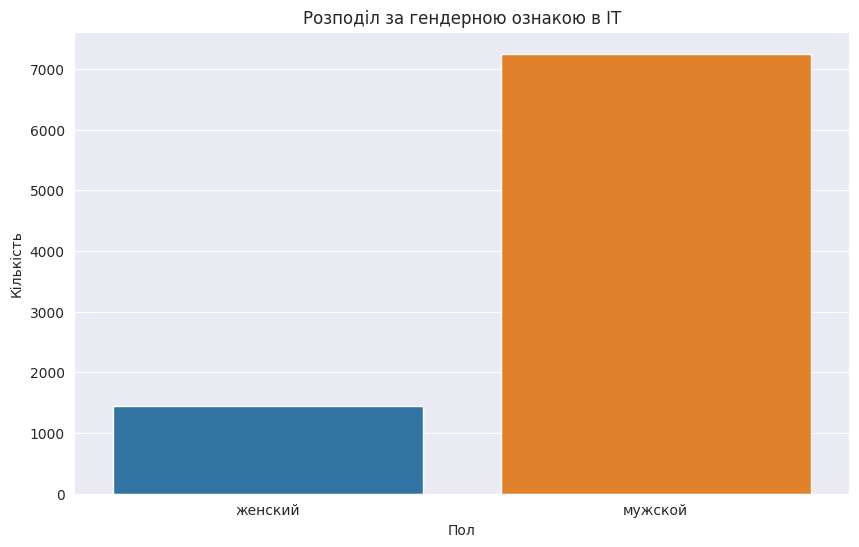

In [141]:
plt.figure(figsize=(10, 6))
plt.title('Розподіл за гендерною ознакою в IT')
sns.countplot(data=df, x='Пол')
plt.xlabel('Пол')
plt.ylabel('Кількість')
plt.show()

- Видаліть усі рядки у вихідній таблиці за допомогою методу dropna

In [13]:
df = tabs
df_dropna = df.dropna()
df_dropna



,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,...,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls


- Визначте новий розмір таблиці за допомогою методу shape

In [14]:
df_dropna.shape

(0, 25)

- Створіть нову таблицю python_data, в якій будуть тільки рядки зі спеціалістами, які вказали мову програмування Python

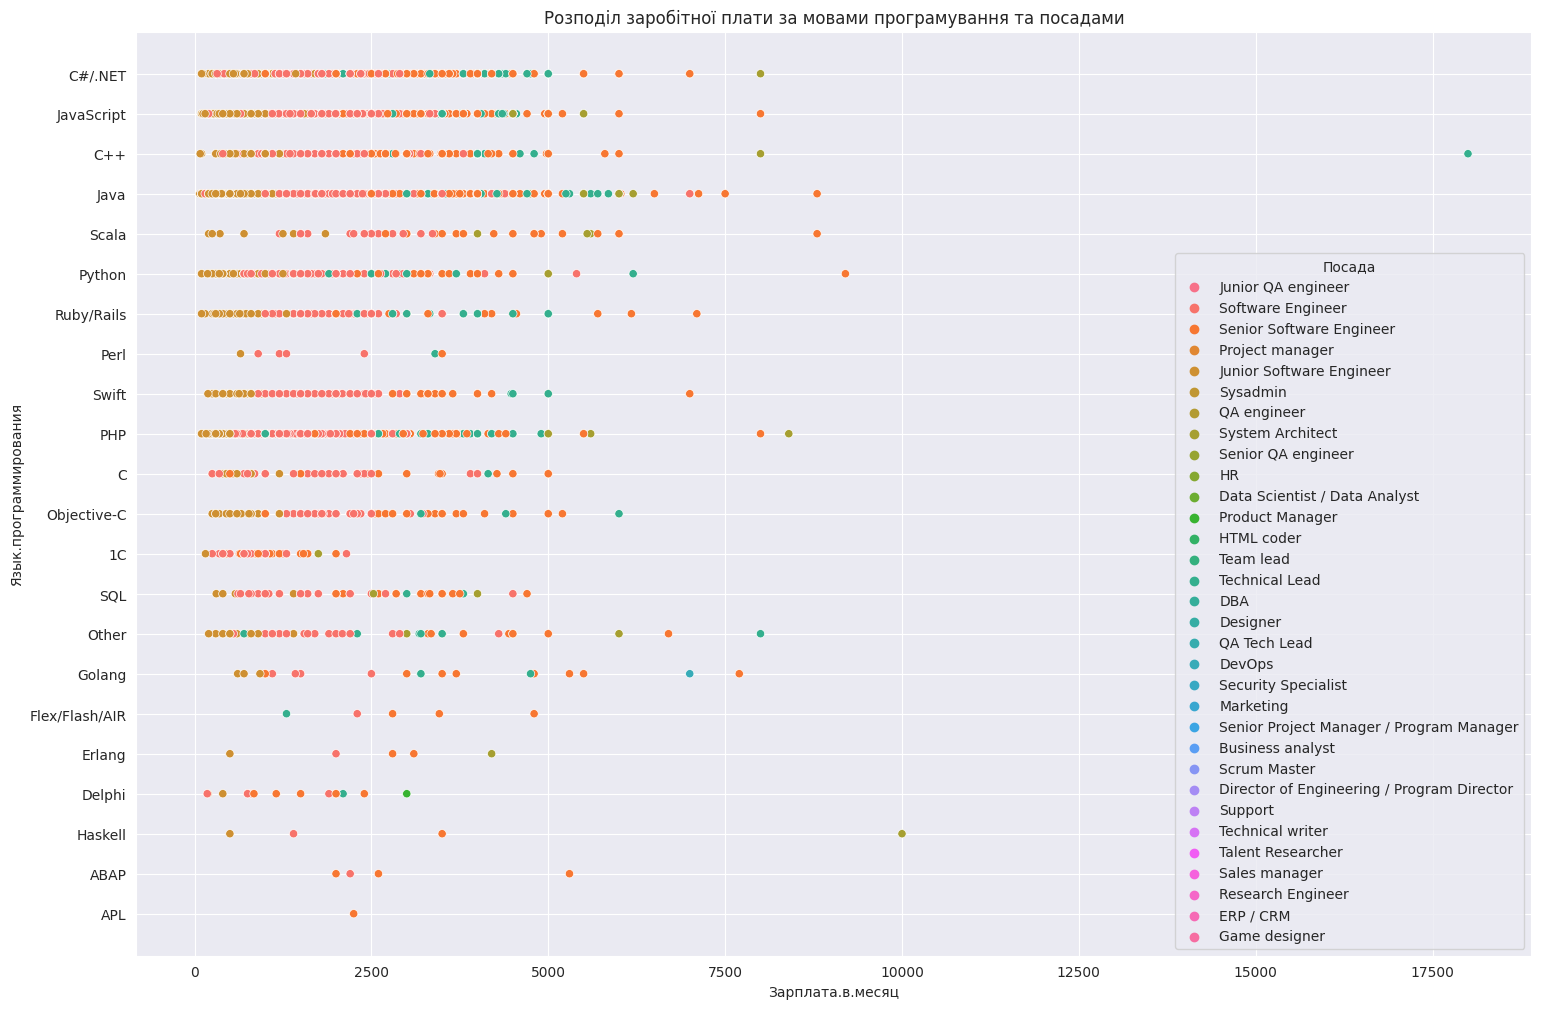

,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,...,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харьков,до 10 человек,...,True,ниже среднего,"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,меньше 3 месяцев,меньше 3 месяцев,430,130,Харьков,свыше 1000 человек,...,True,выше среднего,Веб-разработка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Киев,до 1000 человек,...,False,средний,"Веб-разработка,Корпоративные системы",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
3,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одесса,до 200 человек,...,False,ниже среднего,"Desktop Applications,Веб-разработка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
4,5,Senior Software Engineer,JavaScript,NaN,10 и более лет,0.5,4500,500,Другой,до 10 человек,...,False,средний,"Desktop Applications,Веб-разработка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699,8700,QA engineer,NaN,Manual QA,1,меньше 3 месяцев,700,700,Одесса,до 50 человек,...,False,средний,"Android,Desktop Applications",12/07/2017 15:45:24,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:54....,1.0,0.0,700,NaN,QA
8700,8701,Marketing,NaN,NaN,0.5,0.5,400,120,Киев,до 50 человек,...,False,ниже среднего,eCommerce,12/07/2017 17:00:06,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,NaN
8701,8702,Junior Software Engineer,Ruby/Rails,NaN,1,0.5,800,500,Львов,до 10 человек,...,False,выше среднего,"Веб-разработка,Корпоративные системы",12/07/2017 17:32:26,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,0.5,800,NaN,DEV
8702,8703,Team lead,NaN,NaN,6,4,2600,0,Днепр,свыше 1000 человек,...,False,продвинутый,Финансы и банки,12/07/2017 18:14:59,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,6.0,4.0,2600,NaN,PM


In [139]:
plt.figure(figsize=(18, 12))
sns.scatterplot(x='Зарплата.в.месяц', y='Язык.программирования', hue='Должность', data=df)
plt.title('Розподіл заробітної плати за мовами програмування та посадами')
plt.legend(title='Посада')
plt.show()

display(df)


In [15]:
df = tabs
python_data = df[df['Язык.программирования'] == 'Python']
python_data.reset_index(inplace=True)
python_data

,index,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,...,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,12,13,Software Engineer,Python,NaN,1,меньше 3 месяцев,800,200,Киев,...,False,ниже среднего,"Веб-разработка,Другое",12/06/2017 13:05:54,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,1.0,0.0,800,NaN,DEV
1,68,69,Software Engineer,Python,NaN,1.5,0.5,900,900,Киев,...,True,выше среднего,Веб-разработка,12/06/2017 13:11:17,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.5,0.5,900,NaN,DEV
2,87,88,Junior Software Engineer,Python,NaN,0.5,0.5,600,0,Киев,...,True,выше среднего,"Веб-разработка,eCommerce",12/06/2017 13:12:25,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,0.5,0.5,600,NaN,DEV
3,114,115,Junior Software Engineer,Python,NaN,1.5,0.5,685,250,Киев,...,False,средний,Другое,12/06/2017 13:14:52,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.5,0.5,685,NaN,DEV
4,143,144,Junior Software Engineer,Python,NaN,1,1,750,250,Киев,...,True,выше среднего,Веб-разработка,12/06/2017 13:19:10,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,1.0,750,NaN,DEV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,8546,8547,Software Engineer,Python,NaN,5,1,2000,800,Запорожье,...,False,средний,Веб-разработка,10/07/2017 14:11:26,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_5...,5.0,1.0,2000,NaN,DEV
203,8625,8626,Software Engineer,Python,NaN,4,1,1750,0,Киев,...,False,средний,Веб-разработка,11/07/2017 16:15:40,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:54....,4.0,1.0,1750,NaN,DEV
204,8635,8636,Senior Software Engineer,Python,NaN,10 и более лет,меньше 3 месяцев,4000,1300,Удаленно,...,False,выше среднего,Веб-разработка,11/07/2017 17:51:36,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,10.0,0.0,4000,NaN,DEV
205,8673,8674,Junior Software Engineer,Python,NaN,0.5,0.5,350,50,Киев,...,False,средний,Веб-разработка,12/07/2017 09:37:16,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:54....,0.5,0.5,350,NaN,DEV


- Визначте розмір таблиці python_data за допомогою методу shape

In [16]:
row, column = python_data.shape
print("column:", column)
print("row:", row)

column: 26
row: 207


- Використовуючи метод groupby, виконайте групування за стовпчиком "Посада"

In [17]:
python_data.groupby(['Должность'])
python_data

,index,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,...,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,12,13,Software Engineer,Python,NaN,1,меньше 3 месяцев,800,200,Киев,...,False,ниже среднего,"Веб-разработка,Другое",12/06/2017 13:05:54,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,1.0,0.0,800,NaN,DEV
1,68,69,Software Engineer,Python,NaN,1.5,0.5,900,900,Киев,...,True,выше среднего,Веб-разработка,12/06/2017 13:11:17,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.5,0.5,900,NaN,DEV
2,87,88,Junior Software Engineer,Python,NaN,0.5,0.5,600,0,Киев,...,True,выше среднего,"Веб-разработка,eCommerce",12/06/2017 13:12:25,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,0.5,0.5,600,NaN,DEV
3,114,115,Junior Software Engineer,Python,NaN,1.5,0.5,685,250,Киев,...,False,средний,Другое,12/06/2017 13:14:52,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.5,0.5,685,NaN,DEV
4,143,144,Junior Software Engineer,Python,NaN,1,1,750,250,Киев,...,True,выше среднего,Веб-разработка,12/06/2017 13:19:10,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,1.0,750,NaN,DEV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,8546,8547,Software Engineer,Python,NaN,5,1,2000,800,Запорожье,...,False,средний,Веб-разработка,10/07/2017 14:11:26,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_5...,5.0,1.0,2000,NaN,DEV
203,8625,8626,Software Engineer,Python,NaN,4,1,1750,0,Киев,...,False,средний,Веб-разработка,11/07/2017 16:15:40,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:54....,4.0,1.0,1750,NaN,DEV
204,8635,8636,Senior Software Engineer,Python,NaN,10 и более лет,меньше 3 месяцев,4000,1300,Удаленно,...,False,выше среднего,Веб-разработка,11/07/2017 17:51:36,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,10.0,0.0,4000,NaN,DEV
205,8673,8674,Junior Software Engineer,Python,NaN,0.5,0.5,350,50,Киев,...,False,средний,Веб-разработка,12/07/2017 09:37:16,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:54....,0.5,0.5,350,NaN,DEV


- Salary Python

In [83]:
df = tabs
gb_df = python_data.groupby(['Должность'])
salary_py = gb_df.agg({'Зарплата.в.месяц': ['min', 'max', 'mean', 'size']})
display(salary_py)

Зарплата.в.месяц                        
                                      min   max         mean size
Должность                                                        
Junior Software Engineer              100  1250   560.841270   63
Senior Software Engineer             1300  9200  3387.096774   31
Software Engineer                     500  5400  1799.070000  100
System Architect                     3000  5000  4000.000000    2
Technical Lead                       1425  6200  3165.909091   11

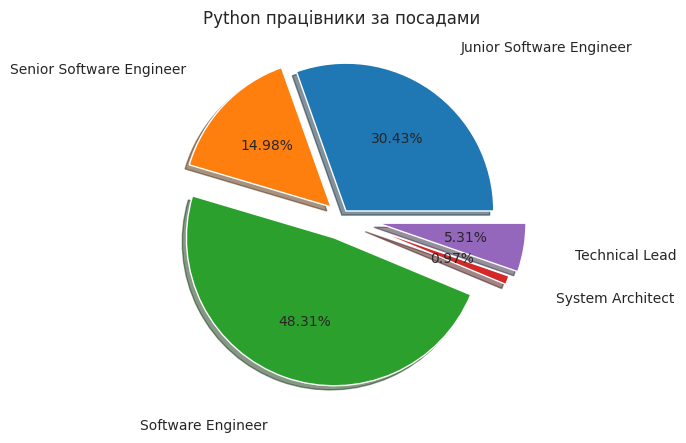

In [140]:
labels = salary_py.index
data = salary_py[('Зарплата.в.месяц', 'size')]
explode = [0.05, 0.10, 0.15, 0.20, 0.25]
plt.pie(
    data,
    labels=labels,
    explode=explode,
    labeldistance=1.35,
    shadow=True,
    autopct="%.2f%%",
)

plt.title("Python працівники за посадами")
plt.show()

- Створіть новий DataFrame, де для згрупованих даних за стовпчиком "Посада", виконайте агрегацію даних за допомогою методу agg і знайдіть мінімальне та максимальне значення у стовпчику "Зарплата.в.місяць"

In [85]:
df = tabs
gb_df = df.groupby(['Должность'])
salary_all = gb_df.agg({'Зарплата.в.месяц': ['min', 'max', 'size']})
display(salary_all)

Зарплата.в.месяц             
                                                        min    max  size
Должность                                                               
Business analyst                                        200   5000   150
DBA                                                     380   6000    26
Data Scientist / Data Analyst                           150   8000    79
Designer                                                100   4000   223
DevOps                                                  194  10000   170
Director of Engineering / Program Director             1500  34000    44
ERP / CRM                                               100   6000    12
Game designer                                           150   6800    18
HR                                                      100   7000   247
HTML coder                                              154   3000   156
Junior QA engineer                                       96   2000   404
Junior Software Engineer                                 75   2600  1280
Marketing                                               100   4000   138
Product Manager                                         250   5000    87
Project manager                                         190   8000   371
QA Tech Lead                                            430   6000    79
QA engineer                                             150   2900   738
Research Engineer                                       114   4000    14
Sales manager                                           120   2300    85
Scrum Master                                            370   4500    19
Security Specialist                                     300   4000    12
Senior Project Manager / Program Manager                200   9100    66
Senior QA engineer                                      400   6000   263
Senior Software Engineer                                350   9200  1080
Software Engineer                                       100   7000  2168
Support                                                 138   3650   115
Sysadmin                                                 90   3000   129
System Architect                                        400  10000    65
Talent Researcher                                       100   1700    36
Team lead                                               300   7000   152
Technical Lead                                          500  18000   250
Technical writer                                        200   3000    28

- Створіть функцію fill_avg_salary, яка повертатиме середнє значення заробітної плати на місяць. Використовуйте її для методу apply та створіть новий стовпчик "avg"

In [88]:
df = tabs
gb_df = df.groupby(['Должность'])

def fill_avg_salary(x):
    return x['Зарплата.в.месяц'].mean()

salary_py['avg'] = gb_df.apply(fill_avg_salary)
salary_py['avg']

Должность
Junior Software Engineer     605.658594
Senior Software Engineer    3243.200926
Software Engineer           1678.630074
System Architect            4387.076923
Technical Lead              3664.272000
Name: avg, dtype: float64

- Створіть описову статистику за допомогою методу describe для нового стовпчика.

In [89]:
salary_all['avg'].describe

<bound method NDFrame.describe of Должность
Business analyst                              1551.500000
DBA                                           1653.269231
Data Scientist / Data Analyst                 1544.240506
Designer                                      1134.161435
DevOps                                        2162.688235
Director of Engineering / Program Director    5066.363636
ERP / CRM                                     1370.833333
Game designer                                 1455.277778
HR                                             850.283401
HTML coder                                     550.993590
Junior QA engineer                             482.774752
Junior Software Engineer                       605.658594
Marketing                                      861.282609
Product Manager                               2054.471264
Project manager                               1512.846361
QA Tech Lead                                  2684.430380
QA engineer                 

- Збережіть отриману таблицю в CSV файл

In [93]:
header = ['мінімальна_ЗП', 'максимальна_ЗП', 'працівників', 'середня_ЗП']
salary_all.to_csv('salary.csv', header=header)
data = pd.read_csv('salary.csv')
data

,Должность,мінімальна_ЗП,максимальна_ЗП,працівників,середня_ЗП
0,Business analyst,200,5000,150,1551.500000
1,DBA,380,6000,26,1653.269231
2,Data Scientist / Data Analyst,150,8000,79,1544.240506
3,Designer,100,4000,223,1134.161435
4,DevOps,194,10000,170,2162.688235
5,Director of Engineering / Program Director,1500,34000,44,5066.363636
6,ERP / CRM,100,6000,12,1370.833333
7,Game designer,150,6800,18,1455.277778
8,HR,100,7000,247,850.283401
9,HTML coder,154,3000,156,550.993590


In [105]:
df = tabs
gb_df = df.groupby(['Язык.программирования'])
salary_ln = gb_df.agg({'Зарплата.в.месяц': ['min', 'max', 'mean'], 'Язык.программирования': 'size'})
salary_ln.columns = ['мінімальна ЗП', 'максимальна ЗП', 'середня ЗП', 'к-ть працівників']
display(salary_ln)

,мінімальна ЗП,максимальна ЗП,середня ЗП,к-ть працівників
Язык.программирования,,,,
1С,155,2148,941.142857,42
ABAP,2000,5300,3025.000000,4
APL,2250,2250,2250.000000,1
C,250,5000,2037.685185,54
C#/.NET,100,8000,2084.525240,832
C++,80,18000,2398.194444,216
Delphi,180,3000,1265.647059,17
Erlang,500,4200,2520.000000,5
Flex/Flash/AIR,1300,4800,2932.000000,5


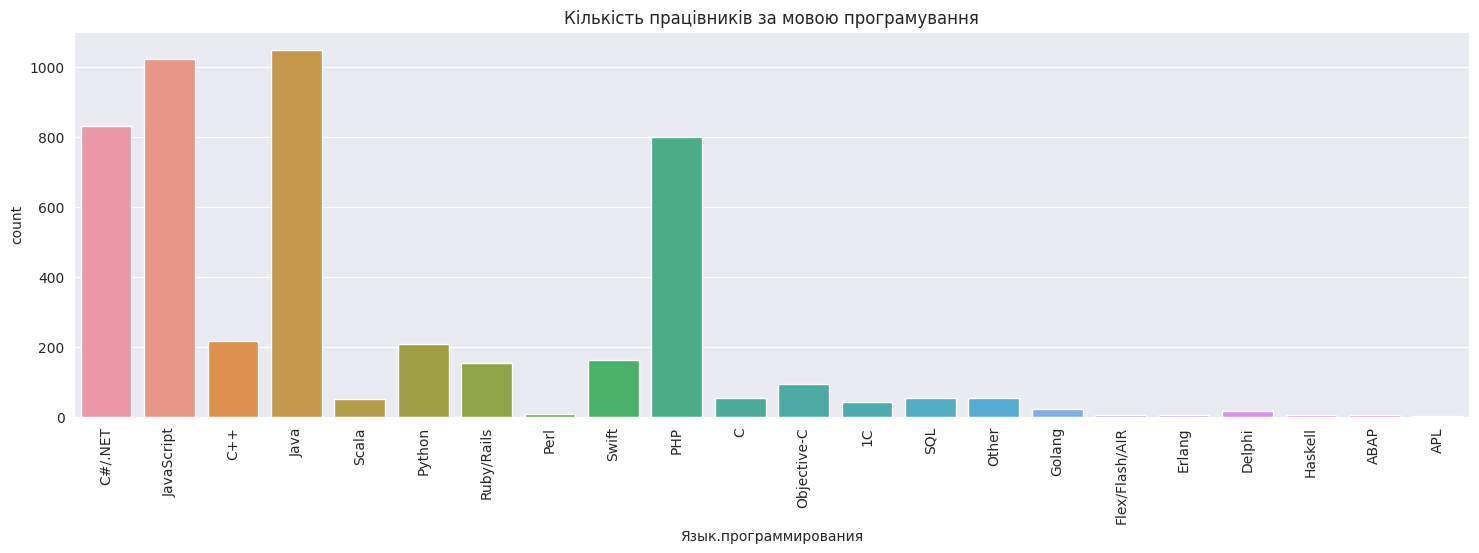

In [112]:
plt.figure(figsize=(18, 5))
sns.countplot(x="Язык.программирования", data=df)
plt.xticks(rotation=90)
plt.title("Кількість працівників за мовою програмування")
plt.show()
